# Tokenization

In [1]:
import nltk 
from nltk.tokenize import word_tokenize, sent_tokenize 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\psagv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
text = "Tokenization is an essential step in NLP. It helps in breaking down text." 
# Word Tokenization 
word_tokens = word_tokenize(text) 
print("Word Tokens:", word_tokens)

Word Tokens: ['Tokenization', 'is', 'an', 'essential', 'step', 'in', 'NLP', '.', 'It', 'helps', 'in', 'breaking', 'down', 'text', '.']


# Sentence Tokenization 

In [3]:
# Sentence Tokenization 
sentence_tokens = sent_tokenize(text) 
print("Sentence Tokens:", sentence_tokens)

Sentence Tokens: ['Tokenization is an essential step in NLP.', 'It helps in breaking down text.']


# Embeddings

In [4]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
import numpy as np

In [5]:
# Sample word vectors (normally obtained from a model like Word2Vec) 
word_vectors = { 
    "king": [0.5, 0.8, 0.1], 
    "queen": [0.6, 0.7, 0.2], 
    "man": [0.9, 0.2, 0.5], 
    "woman": [0.8, 0.3, 0.6] 
} 
words = list(word_vectors.keys()) 
vectors = np.array(list(word_vectors.values()))

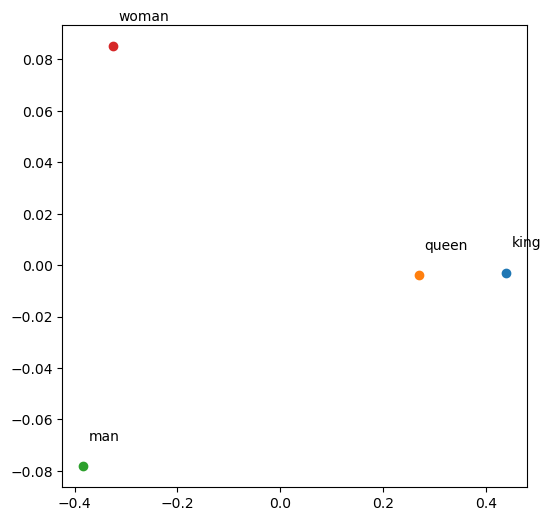

In [6]:
# Reduce dimensions to 2D using PCA 
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors) 
plt.figure(figsize=(6, 6)) 
for i, word in enumerate(words): 
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1]) 
    plt.text(reduced_vectors[i, 0] + 0.01,  
reduced_vectors[i, 1] + 0.01, word) 
plt.show()

# 3. Embedding Techniques 
# 3.1 
# Word2Vec 

In [7]:
from gensim.models import Word2Vec 
sentences = [["I", "love", "natural", "language", "processing"], 
             ["Word2Vec", "is", "a", "great", "embedding",
 "technique"]] 

In [8]:
# Train model 
model = Word2Vec(sentences, vector_size=50, window=5,
 min_count=1, workers=4)

In [9]:
print(model)# 
# Get word vector

Word2Vec<vocab=11, vector_size=50, alpha=0.025>


In [10]:
 print(model.wv["natural"])  # Word embedding for "natural"

[-0.01427803  0.00248206 -0.01435343 -0.00448924  0.00743861  0.01166625
  0.00239637  0.00420546 -0.00822078  0.01445067 -0.01261408  0.00929443
 -0.01643995  0.00407294 -0.0099541  -0.00849538 -0.00621797  0.01131042
  0.0115968  -0.0099493   0.00154666 -0.01699156  0.01561961  0.01851458
 -0.00548466  0.00160045  0.0014933   0.01095577 -0.01721216  0.00116891
  0.01373884  0.00446319  0.00224935 -0.01864431  0.01696473 -0.01252825
 -0.00598475  0.00698757 -0.00154526  0.00282258  0.00356398 -0.0136578
 -0.01944962  0.01808117  0.01239611 -0.01382586  0.00680696  0.00041213
  0.00950749 -0.01423989]


# 3.2 GloVe (Global Vectors for Word Representation)

In [17]:
import numpy as np

In [18]:
path = r"C:\Users\psagv\Documents\glove.6B\glove.6B.100d.txt"

In [19]:
def load_glove_model(file_path):
    print("Loading GloVe model...")
    glove = {}
    with open(file_path, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = list(map(float, parts[1:]))
            glove[word] = vector
    print("Done. Loaded {} words.".format(len(glove)))
    return glove


In [20]:
#open('C:\\Users\\psagv\\Downloads\\glove.6B', 'r')

path = r"C:\Users\psagv\Documents\glove.6B\glove.6B.100d.txt"

glove_vectors = load_glove_model(path)  # <== use the full path here
print(glove_vectors["king"])


Loading GloVe model...
Done. Loaded 400000 words.
[-0.32307, -0.87616, 0.21977, 0.25268, 0.22976, 0.7388, -0.37954, -0.35307, -0.84369, -1.1113, -0.30266, 0.33178, -0.25113, 0.30448, -0.077491, -0.89815, 0.092496, -1.1407, -0.58324, 0.66869, -0.23122, -0.95855, 0.28262, -0.078848, 0.75315, 0.26584, 0.3422, -0.33949, 0.95608, 0.065641, 0.45747, 0.39835, 0.57965, 0.39267, -0.21851, 0.58795, -0.55999, 0.63368, -0.043983, -0.68731, -0.37841, 0.38026, 0.61641, -0.88269, -0.12346, -0.37928, -0.38318, 0.23868, 0.6685, -0.43321, -0.11065, 0.081723, 1.1569, 0.78958, -0.21223, -2.3211, -0.67806, 0.44561, 0.65707, 0.1045, 0.46217, 0.19912, 0.25802, 0.057194, 0.53443, -0.43133, -0.34311, 0.59789, -0.58417, 0.068995, 0.23944, -0.85181, 0.30379, -0.34177, -0.25746, -0.031101, -0.16285, 0.45169, -0.91627, 0.64521, 0.73281, -0.22752, 0.30226, 0.044801, -0.83741, 0.55006, -0.52506, -1.7357, 0.4751, -0.70487, 0.056939, -0.7132, 0.089623, 0.41394, -1.3363, -0.61915, -0.33089, -0.52881, 0.16483, -0.98878]

# Training FastText Model 

In [21]:
from gensim.models import FastText 

In [22]:
sentences = [["I", "love", "NLP"], 
             ["FastText", "handles", "subwords", "effectively"]]

In [23]:
# Train FastText model 
fasttext_model = FastText(sentences, vector_size=50, window=5,
 min_count=1, workers=4)

In [24]:
print(fasttext_model.wv["FastText"])  # Word vector for "FastText"

[-7.4863771e-04 -1.2441239e-03 -7.8757707e-04 -1.2510584e-03
 -2.4062311e-03  2.9784511e-04  6.9414341e-04 -2.7454433e-03
 -2.9254644e-04  3.3950156e-03 -7.1672730e-05  1.0520812e-03
 -1.8721876e-03  7.9723075e-04  3.6351306e-03 -7.5979461e-04
 -2.5690862e-04 -2.1632875e-03  1.4319464e-03  2.2898139e-03
  1.8566982e-03 -1.2359655e-03 -1.7863109e-03 -1.7633548e-03
  1.3493120e-03 -9.9458976e-04  4.4526326e-04 -4.0159834e-04
  1.0697113e-03 -1.2284342e-03 -8.5366966e-04  3.1625447e-03
  5.6990716e-03 -7.0645398e-04 -3.6355164e-03 -7.0699234e-04
 -1.5263894e-03 -3.3224765e-03  1.2530701e-04  8.2067237e-04
  1.6236919e-03 -5.1742466e-04 -1.3146736e-03 -5.1431577e-03
 -5.1055867e-03  2.9259718e-03  1.9810922e-03  3.2832872e-03
 -1.9317989e-04  1.1861072e-03]


# Using BERT Embeddings (Hugging Face Transformers) 

In [25]:
#!pip install transformers

In [26]:
#!pip install torch

In [27]:
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

In [28]:
import torch
from transformers import BertModel, BertTokenizer

print(torch.__version__)
print(torch.backends.mps.is_available())  # Should be False on CPU-only systems

# Load BERT base (on CPU)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Try encoding a sample
inputs = tokenizer("Hello world!", return_tensors="pt")
outputs = model(**inputs)

print("BERT output shape:", outputs.last_hidden_state.shape)


2.6.0+cpu
False
BERT output shape: torch.Size([1, 5, 768])


In [29]:
# Load pre-trained BERT model and tokenizer 
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased") 
model = BertModel.from_pretrained("bert-base-uncased") 

In [30]:
sentence = "BERT generates contextual embeddings." 
tokens = tokenizer(sentence, return_tensors="pt") 

In [31]:
 # Get embeddings 
with torch.no_grad(): 
    output = model(**tokens) 
    embeddings = output.last_hidden_state 

In [32]:
print(embeddings.shape)  # (batch_size, sequence_length, hidden_size) 

torch.Size([1, 11, 768])
